We replaced all the code that is used for state preparation using `qml.MottonenStatePreparation`.
By using the built-in `qml.MottonenStatePreparation function`, the code becomes more concise, reliable, and aligned with established methods in quantum computing, as this function follows the [Möttönen et al. (2004)](https://arxiv.org/abs/quant-ph/0407010) scheme for efficient state preparation.

In [40]:
import pennylane as qml
import pennylane.numpy as np
state = np.array([0.53896774, 0.79503606, 0.27826503, 0.0], requires_grad=False)
state = state / np.linalg.norm(state)
dev2 = qml.device("default.qubit")

@qml.qnode(dev2)
def circuit(state):
    # State Preparation
    qml.MottonenStatePreparation(state_vector=state, wires=range(2))
    return qml.state()
print(circuit(state))
print(qml.draw(circuit, expansion_strategy="device", max_length=80)(state))

[0.53896774+0.j 0.79503606+0.j 0.27826503+0.j 0.        +0.j]
0: ──RY(0.56)─╭●───────────╭●─┤  State
1: ──RY(0.98)─╰X──RY(0.98)─╰X─┤  State


In [1]:
from modules.utils import load_and_prepare_iris_data
X_train, Y_train, X_val, Y_val, X_test, Y_test =load_and_prepare_iris_data(0.8,0.1,0.1)

Y_train: Values: [-1.  1.] Counts: [40 40]
Y_val: Values: [-1.  1.] Counts: [4 6]
Y_test: Values: [-1.  1.] Counts: [6 4]


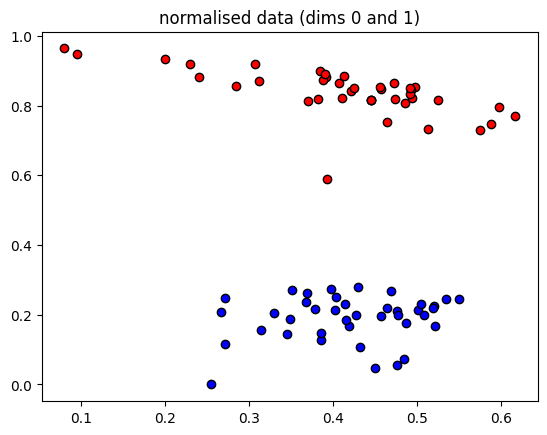

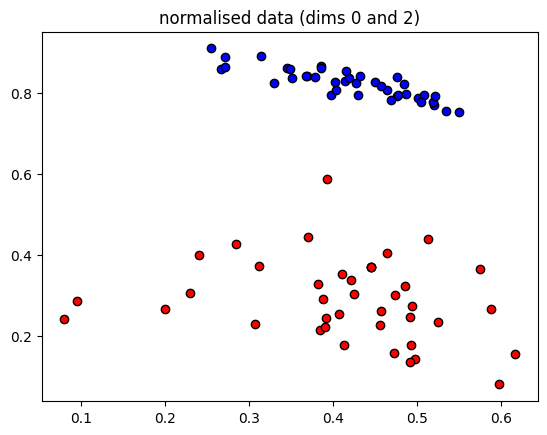

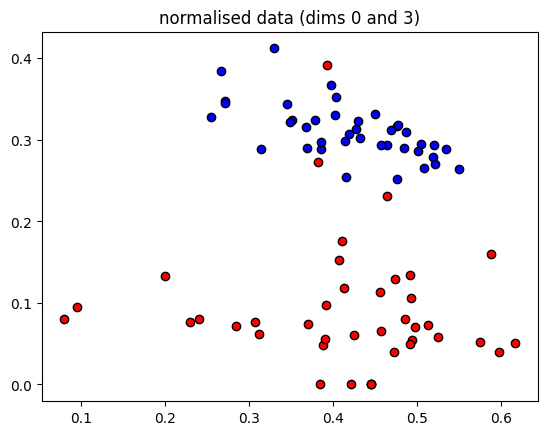

In [6]:
import matplotlib.pyplot as plt

plt.figure()
dim1 = 0
dim2 = 1
plt.scatter(X_train[:, dim1][Y_train == 1], X_train[:, dim2][Y_train == 1], c="b", marker="o", ec="k")
plt.scatter(X_train[:, dim1][Y_train == -1], X_train[:, dim2][Y_train == -1], c="r", marker="o", ec="k")
plt.title(f"normalised data (dims {dim1} and {dim2})")
plt.show()
plt.figure()
dim1 = 0
dim2 = 2
plt.scatter(X_train[:, dim1][Y_train == 1], X_train[:, dim2][Y_train == 1], c="b", marker="o", ec="k")
plt.scatter(X_train[:, dim1][Y_train == -1], X_train[:, dim2][Y_train == -1], c="r", marker="o", ec="k")
plt.title(f"normalised data (dims {dim1} and {dim2})")
plt.show()
plt.figure()
dim1 = 0
dim2 = 3
plt.scatter(X_train[:, dim1][Y_train == 1], X_train[:, dim2][Y_train == 1], c="b", marker="o", ec="k")
plt.scatter(X_train[:, dim1][Y_train == -1], X_train[:, dim2][Y_train == -1], c="r", marker="o", ec="k")
plt.title(f"normalised data (dims {dim1} and {dim2})")
plt.show()

In [1]:
from modules.training import circuit_training
import pennylane.numpy as np
from modules.utils import load_and_prepare_iris_data
X_train, Y_train, X_val, Y_val, X_test, Y_test =load_and_prepare_iris_data(0.8,0.1,0.1)

num_qubits = 2
num_layers = 6

weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)
learning_rate = 0.01
batch_size = 5
num_epochs = 60

# train the variational classifier
weights = weights_init
bias = bias_init

params = circuit_training(X_train,Y_train,X_val, Y_val,num_qubits, num_layers,bias_init,learning_rate,batch_size, num_epochs,state_prep='Mottonen',seed = 0)

Y_train: Values: [-1.  1.] Counts: [40 40]
Y_val: Values: [-1.  1.] Counts: [4 6]
Y_test: Values: [-1.  1.] Counts: [6 4]
Epoch: 0 | Cost: 2.4295415 | Acc train: 0.0000000 | Acc validation: 0.0000000
Epoch: 1 | Cost: 2.8193139 | Acc train: 0.0000000 | Acc validation: 0.0000000
Epoch: 2 | Cost: 1.6502519 | Acc train: 0.2000000 | Acc validation: 0.0000000
Epoch: 3 | Cost: 1.7467082 | Acc train: 0.0000000 | Acc validation: 0.1000000
Epoch: 4 | Cost: 2.5472768 | Acc train: 0.4000000 | Acc validation: 0.5000000
Epoch: 5 | Cost: 3.1012637 | Acc train: 0.0000000 | Acc validation: 0.6000000
Epoch: 6 | Cost: 1.7979552 | Acc train: 0.4000000 | Acc validation: 0.6000000
Epoch: 7 | Cost: 0.3417578 | Acc train: 0.8000000 | Acc validation: 0.6000000
Epoch: 8 | Cost: 0.3234259 | Acc train: 1.0000000 | Acc validation: 0.9000000
Epoch: 9 | Cost: 0.2482286 | Acc train: 1.0000000 | Acc validation: 1.0000000
Epoch: 10 | Cost: 0.2096007 | Acc train: 1.0000000 | Acc validation: 1.0000000
Epoch: 11 | Cost: 0

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC: 1.0


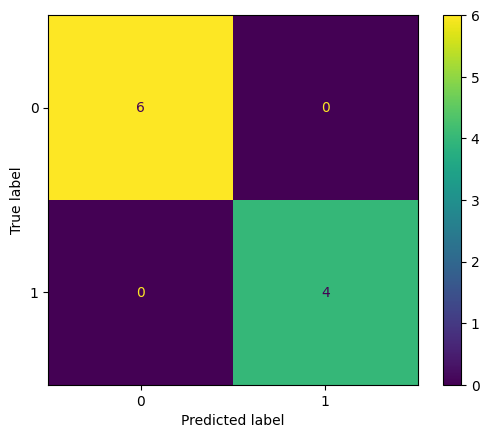

In [3]:
from modules.metrics import show_all_metrics
import pennylane.numpy as np
from modules.training import variational_classifier

test_predictions = [np.sign(variational_classifier(params, bias_init, x,num_qubits, state_prep='Mottonen')) for x in X_test]
show_all_metrics(Y_test,test_predictions)